<a href="https://colab.research.google.com/github/ericdelmelle/SpatialOptimization/blob/main/Knapsack_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example of use of the Pulp libray for a simple knapsack problem

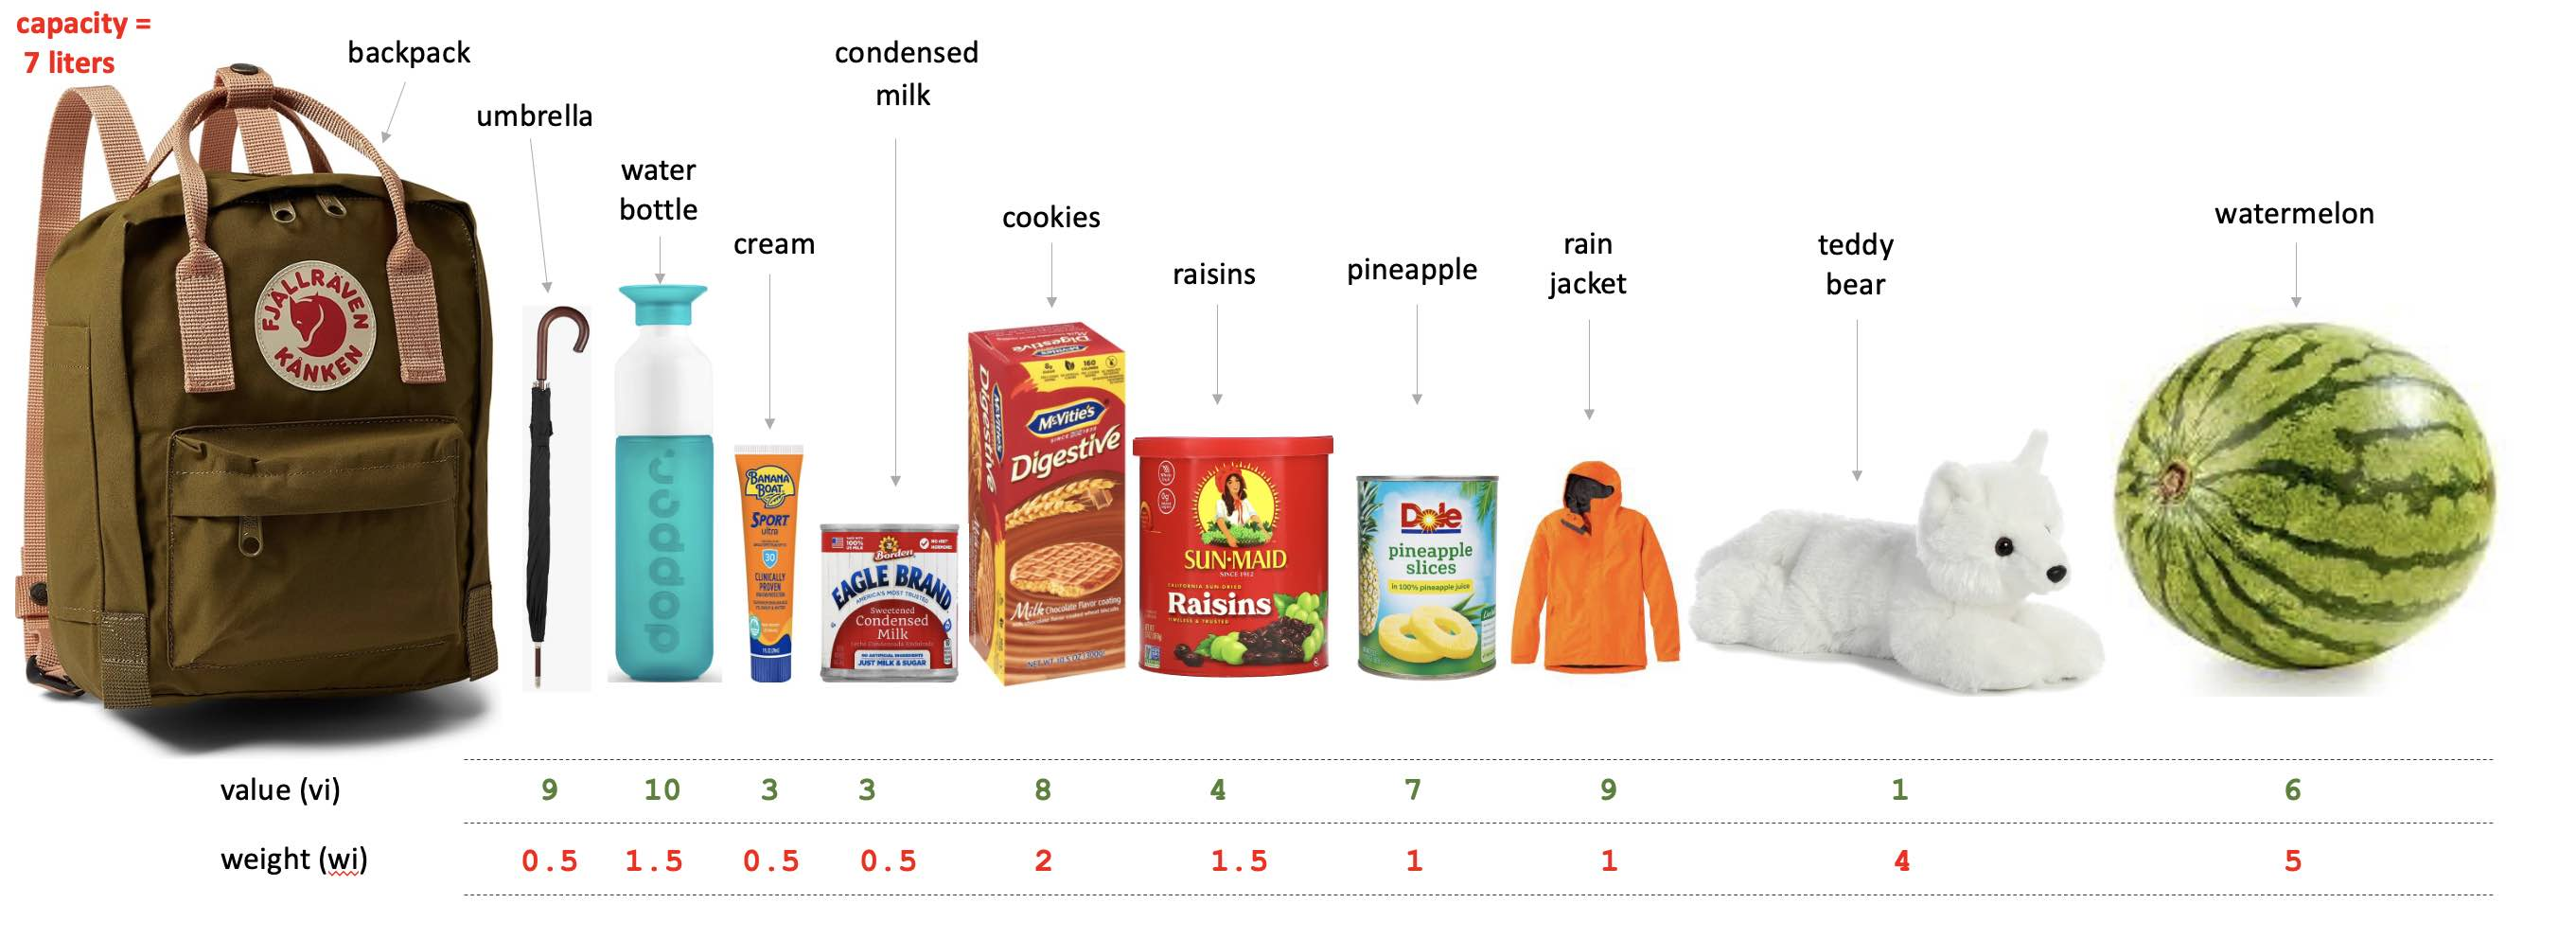


In [ ]:
#Install pulp
!pip install pulp

# Import libraries
from pulp import *
import time

Let set up our problem with the decision variables (items),
with their **value** "v" and **weight** "w". We then set up the **capacity** of our bagpack.

In [4]:
# A list of tuples of items (value, weight)

name_items=["umbrella", "waterBottle", "cream", "condensendMilk", "cookies",
            "raisins", "pinneaple", "rainJacket", "teddyBear", "watermelon"]
items = [(9,0.5), (10,1.5), (3,0.5), (3,0.5), (8,2),
 (4,1.5), (7,1), (9,1), (1,4), (6,5)]

# number of items
itemCount = len(items)

# Knapsack max weight capacity
binCapacity = 7

Here we set up our decision variables (the X), the lower and upper bounds, couple with the integer constrains (cat=Integer)  tells us the decision variable will be binary.

In [5]:
# Decision variables (array), x[i] gets 1 when item i is included in the solution
x = pulp.LpVariable.dicts('item', range(itemCount),
                            lowBound = 0,
                            upBound = 1,
                            cat = 'Integer')

Here we set up our problem (it is of maximization type, and it is a linear programming problem).

We add the objective function (sum of the values), and the constraint (sum of the weights).

In [ ]:
# Initialize the problem and specify the type
problem = LpProblem("Knapsack Problem", LpMaximize)

# Add the objective function
problem += lpSum([ x[i] * (items[i])[0] for i in range(itemCount) ]), "Objective: Maximize bagpack value"

# Capacity constraint: the sum of the weights must be less than the capacity
problem += lpSum([ x[i] * (items[i])[1] for i in range(itemCount) ]) <= binCapacity, "Constraint: Max capacity"

Here we write the problem as an lp file and we then solve it, using the "**solve**" function. We also keep track of the time it takes.

In [7]:
#print problem.constraints

# Write the model to disk, not necessary
problem.writeLP("Knapsack.lp")

# Solve the optimization problem
start_time = time.time()
problem.solve()
print("Solved in %s seconds." % (time.time() - start_time))

Solved in 0.013692378997802734 seconds.


Finally, we report on the optimal solution, and whether each variable was chosen or not

In [8]:
# Was the problem solved to optimality?
print("Status:", LpStatus[problem.status])

# Each of the variables is printed with it's resolved optimum value
i=0
for v in problem.variables():
    print(name_items[i], "=", v.varValue)
    i+=1

# The optimised objective function value is printed to the screen
print("Total profit = ", value(problem.objective))

Status: Optimal
umbrella = 1.0
waterBottle = 1.0
cream = 1.0
condensendMilk = 1.0
cookies = 1.0
raisins = 0.0
pinneaple = 1.0
rainJacket = 1.0
teddyBear = 0.0
watermelon = 0.0
Total profit =  49.0


Here, somore more info about the solution

In [10]:
used_cap = 0.0
print("Used items:")
for i in range(itemCount):
    if x[i].value() == 1:
        print(name_items[i], items[i])
        used_cap += items[i][1]
print("Profit: %d - Used capacity: %d (/ %d)" % (value(problem.objective), used_cap, binCapacity))



Used items:
umbrella (9, 0.5)
waterBottle (10, 1.5)
cream (3, 0.5)
condensendMilk (3, 0.5)
cookies (8, 2)
pinneaple (7, 1)
rainJacket (9, 1)
Profit: 49 - Used capacity: 7 (/ 7)
